In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.set_option('display.float_format','{:.2f}'.format)

### 1. Data Load (Semi-Preprocessd)

In [197]:
dataset = pd.read_csv('data/dataset.csv')

In [198]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562375 entries, 0 to 562374
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   size               562375 non-null  int64  
 1   price              562375 non-null  int64  
 2   date               562375 non-null  object 
 3   product            562375 non-null  object 
 4   release_date       562375 non-null  object 
 5   color              562375 non-null  object 
 6   release_price      562375 non-null  int64  
 7   type               562375 non-null  object 
 8   brand              562375 non-null  object 
 9   category           562375 non-null  object 
 10  number             562375 non-null  float64
 11  wish               562375 non-null  float64
 12  review             562375 non-null  float64
 13  transactions       562375 non-null  int64  
 14  review_log         562375 non-null  float64
 15  wish_log           562375 non-null  float64
 16  si

In [199]:
print(dataset.shape)
dataset.head(1)

(562375, 31)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947.00,93.00,4.00,30,1.39,4.53,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,7,1.95,738108,738101


In [200]:
len(dataset['product'].value_counts())

954

In [201]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=123)

In [202]:
pd.set_option('display.float_format','{:.0f}'.format)
train_set[['size', 'release_price', 'wish', 'review', 'transactions', 'after_day', 'release_date_unix']].describe()

,size,release_price,wish,review,transactions,after_day,release_date_unix
count,449900,449900,449900,449900,449900,449900,449900
mean,258,148575,9362,755,2852,124,737813
std,21,80895,10777,1408,3184,216,261
min,80,59000,11,0,1,1,732220
25%,245,119000,2475,87,1008,12,737723
50%,260,139000,5676,290,1639,48,737859
75%,275,169000,12000,750,3664,134,737988
max,330,3000000,52000,7820,18150,5573,738153


In [203]:
train_set.describe()

,size,price,release_price,number,wish,review,transactions,review_log,wish_log,color_count,after_day,after_day_log,date_unix,release_date_unix
count,449900,449900,449900,449900,449900,449900,449900,449900,449900,449900,449900,449900,449900,449900
mean,258,313769,148575,31478,9362,755,2852,5,9,2,124,4,737937,737813
std,21,402742,80895,7315,10777,1408,3184,2,1,1,216,2,158,261
min,80,34000,59000,36,11,0,1,-14,2,1,1,0,737454,732220
25%,245,168000,119000,26014,2475,87,1008,4,8,2,12,2,737837,737723
50%,260,229000,139000,30578,5676,290,1639,6,9,2,48,4,737953,737859
75%,275,324000,169000,37536,12000,750,3664,7,9,3,134,5,738070,737988
max,330,20000000,3000000,47901,52000,7820,18150,9,11,5,5573,9,738163,738153


### 2. EDA and Preprocessing

In [204]:
data = dataset.copy()

In [14]:
# data.loc[data['Collabo'] == True, 'Collabo'] = 1
# data.loc[data['Collabo'] == False, 'Collabo'] = 0

In [15]:
# data.loc[data['multicolor'] == True, 'multicolor'] = 1
# data.loc[data['multicolor'] == False, 'multicolor'] = 0

In [16]:
# data['Collabo'].apply(int)
# data['multicolor'].apply(int)

In [17]:
data['Collabo'].value_counts()

False    488668
True      73707
Name: Collabo, dtype: int64

In [18]:
data['multicolor'].value_counts()

True     532086
False     30289
Name: multicolor, dtype: int64

In [19]:
data[data['category'] == 'Nike Air Force']['product'].value_counts()

Nike x Supreme Air Force 1 Low White                        5950
Nike Air Force 1 '07 LV8 Paisley Swoosh                     3592
Nike x Stussy Air Force 1 Low Triple Black                  2794
Nike Air Force 1 B Silver Snake                             2399
Nike x Supreme Air Force 1 Low Black                        2200
                                                            ... 
Nike Lunar Force 1 Fuse Area 72                                1
(W) Nike Air Force 1 Shadow White Crimson Blue                 1
Nike Air Force 1 React Wolf Grey                               1
(W) Nike Air Force 1 High Shell Platinum Violet                1
(W) Nike Air Force 1 Shadow Sail Signal Blue Green Noise       1
Name: product, Length: 333, dtype: int64

In [20]:
data.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,7,2,738108,738101


In [21]:
# min_date = data.groupby('product')['date'].min()

In [22]:
# min_date = pd.DataFrame({'product':min_date.index, 'min_date':min_date.values})

In [23]:
# data = pd.merge(data, min_date, how='left', on='product')

In [24]:
# data['date'] = pd.to_datetime(data['date'])
# data['release_date'] = pd.to_datetime(data['release_date'])
# data['min_date'] = pd.to_datetime(data['min_date'])

In [25]:
# data['after_first'] = data['min_date'] - data['release_date']

In [26]:
# data['after_first'] = data['after_first'].dt.days

In [27]:
print(data.shape)
data.head(1)

(562375, 31)


,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,7,2,738108,738101


In [66]:
data[data['date']=='2021-09-08']['date_unix']

441       738041
442       738041
443       738041
444       738041
445       738041
           ...  
558702    738041
558703    738041
558704    738041
558705    738041
558706    738041
Name: date_unix, Length: 1544, dtype: int64

<AxesSubplot:xlabel='Collabo', ylabel='price'>

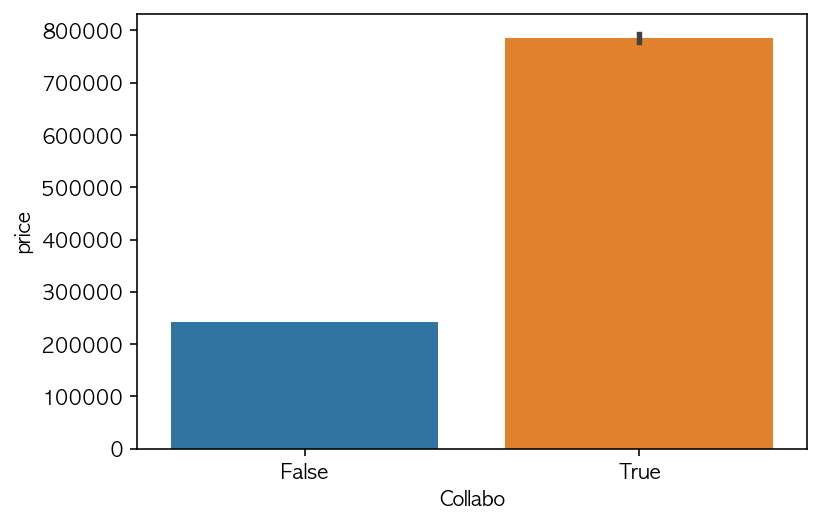

In [29]:
sns.barplot(data=data, x='Collabo', y='price')

In [64]:
len(data['Collabo_brand'].value_counts())

49

In [49]:
df = pd.read_csv('data/nike_dunk(raw).csv')

In [60]:
df[df['release_price'].str.contains('11')]

,size,price,date,product,release_date,color,release_price
30,225,"220,000원",21/10/31,(W) Nike Dunk Low Disrupt Carbon Green,21/10/21,SUMMITWHITE/CARBONGREEN,"€110(약147,400원)"
31,240,"250,000원",21/11/01,(W) Nike Dunk Low Disrupt Carbon Green,21/10/21,SUMMITWHITE/CARBONGREEN,"€110(약147,400원)"
32,275,"249,000원",21/11/03,(W) Nike Dunk Low Disrupt Carbon Green,21/10/21,SUMMITWHITE/CARBONGREEN,"€110(약147,400원)"
33,235,"250,000원",21/11/04,(W) Nike Dunk Low Disrupt Carbon Green,21/10/21,SUMMITWHITE/CARBONGREEN,"€110(약147,400원)"
34,225,"250,000원",21/11/07,(W) Nike Dunk Low Disrupt Carbon Green,21/10/21,SUMMITWHITE/CARBONGREEN,"€110(약147,400원)"
...,...,...,...,...,...,...,...
216889,250,"200,000원",21/12/30,(W) Nike Dunk High Grey Fog,21/09/08,GREYFOG/PARTICLEGREY,"$110(약132,300원)"
216890,250,"200,000원",21/12/31,(W) Nike Dunk High Grey Fog,21/09/08,GREYFOG/PARTICLEGREY,"$110(약132,300원)"
216891,245,"180,000원",21/12/31,(W) Nike Dunk High Grey Fog,21/09/08,GREYFOG/PARTICLEGREY,"$110(약132,300원)"
216892,265,"218,000원",22/01/01,(W) Nike Dunk High Grey Fog,21/09/08,GREYFOG/PARTICLEGREY,"$110(약132,300원)"


In [61]:
df2 = pd.read_csv('data/nike_dunk(pre).csv')

In [62]:
df2[df2['product'] == '(W) Nike Dunk High Grey Fog']

,Unnamed: 0,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions
217125,217125,270,199000,2021-11-08,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217126,217126,235,129000,2021-11-14,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217127,217127,270,238000,2021-11-19,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217128,217128,225,159000,2021-11-22,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217129,217129,225,198000,2021-11-23,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217130,217130,225,200000,2021-12-01,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217131,217131,265,230000,2021-12-03,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217132,217132,235,200000,2021-12-05,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217133,217133,235,279000,2021-12-08,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19
217134,217134,265,199000,2021-12-11,(W) Nike Dunk High Grey Fog,2021-09-08,GREYFOG/PARTICLEGREY,132300,Nike,Nike Dunk,43634,342,2,19


### re EDA

In [78]:
pd.set_option('display.float_format','{:.0f}'.format)

In [79]:
# data.groupby(['Collabo_brand'])['price'].min().sort_values(ascending=False)

In [80]:
# data.loc[data['Collabo_brand'] == 'Dior', 'Collabo_brand_class'] = 'Dior'
# data.loc[data['Collabo_brand'] == 'None', 'Collabo_brand_class'] = 'None'

In [81]:
# data.loc[data['Collabo_brand_class'].isnull(), 'Collabo_brand_class'] = 'etc'

In [82]:
# data['Collabo_brand_class'].value_counts()

In [83]:
# data

In [134]:
data['size_target']

In [205]:
# after_day 조정 
data['min'] = data['after_day'].min()
data = data[data['min'] == 1]

In [206]:
data

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix,min
0,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,7,2,738108,738101,1
1,255,149000,2021-11-18,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,11,2,738112,738101,1
2,240,120000,2021-11-24,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,17,3,738118,738101,1
3,240,124000,2021-11-29,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,22,3,738123,738101,1
4,225,90000,2021-12-03,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,26,3,738127,738101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562370,235,239000,2021-12-20,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,153,5,738144,737991,1
562371,235,245000,2021-12-24,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,157,5,738148,737991,1
562372,280,289000,2021-12-26,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,159,5,738150,737991,1
562373,250,235000,2021-12-26,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,159,5,738150,737991,1


In [146]:
dataset['color_red'] = dataset['color'].str.contains('RED')

<AxesSubplot:xlabel='color_red', ylabel='price'>

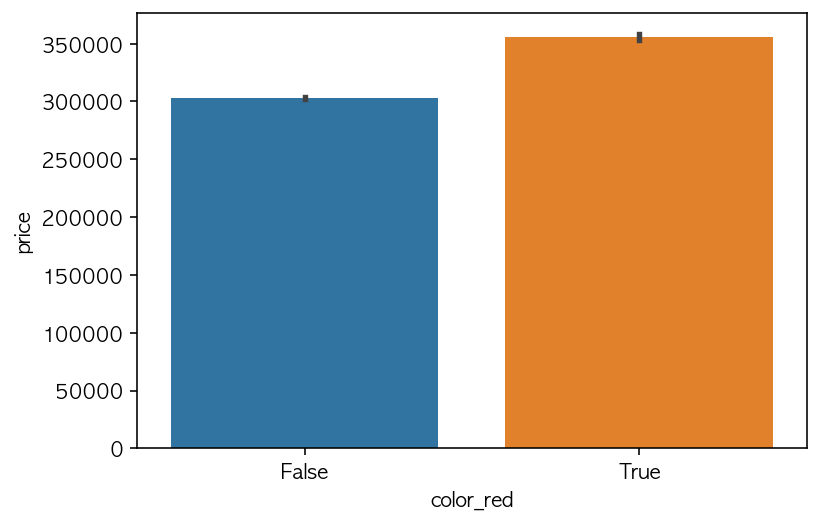

In [142]:
sns.barplot(data=data, x='color_red', y='price')

<AxesSubplot:xlabel='multicolor', ylabel='price'>

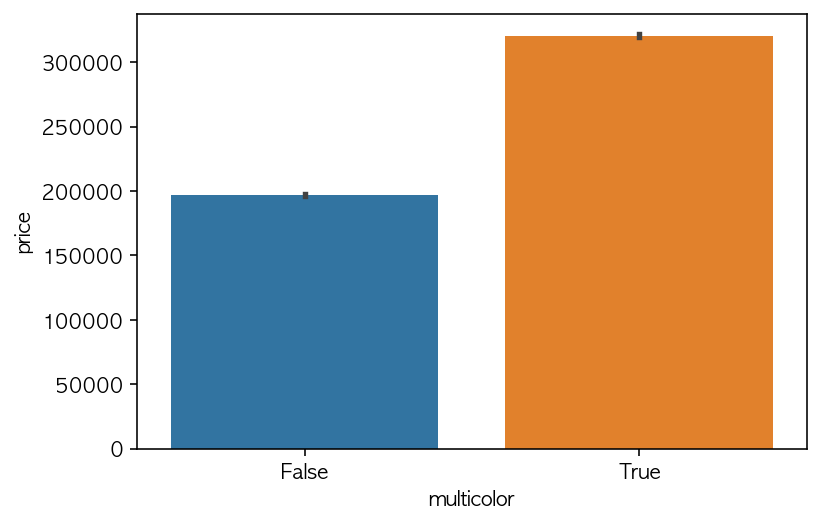

In [141]:
sns.barplot(data=data, x='multicolor', y='price')

In [167]:
# 컬럼 제거 
data = data.drop(['color1','color2','color3','color4','color5','product','after_day_log','release_date','color','min','review','brand','number','transactions','wish','date','wish_log','review_log','color_count','date_unix', 'size_type'],axis = 1)

In [168]:
data_onehot = pd.get_dummies(data, columns = [ 'size_target', 'multicolor', 'Collabo_brand','Collabo','type','category'])

In [170]:
data_onehot.head(5)

,size,price,release_price,after_day,release_date_unix,size_target_Female,size_target_Kids,size_target_Male,multicolor_False,multicolor_True,Collabo_brand_1017 Alyx 9SM,Collabo_brand_A Ma Maniere,Collabo_brand_A-Cold-Wall,Collabo_brand_Acronym Lunar,Collabo_brand_Aleali May,Collabo_brand_Ambush,Collabo_brand_Billie Eilish,Collabo_brand_Blue The Great,Collabo_brand_Cactus Plant Flea Market,Collabo_brand_Carhartt WIP,Collabo_brand_Clot,Collabo_brand_Clot Lunar,Collabo_brand_Clot x Fragment,Collabo_brand_Comme des Garcons Homme Plus,Collabo_brand_Comme des Garcons Shirt x Supreme,Collabo_brand_Dior,Collabo_brand_Fragment,Collabo_brand_Frame Skate,Collabo_brand_Ghetto Gastro,Collabo_brand_J Balvin,Collabo_brand_Just Don,Collabo_brand_Kasina,Collabo_brand_Kith,Collabo_brand_Lance Mountain,Collabo_brand_League of Legends,Collabo_brand_Mayumi Yamase,Collabo_brand_Melody Ehsani,Collabo_brand_NBA,Collabo_brand_None,Collabo_brand_Off-White,Collabo_brand_Olivia Kim,Collabo_brand_PSNY,Collabo_brand_Paris Saint-Germain,Collabo_brand_Parra,Collabo_brand_Quartersnacks,Collabo_brand_Riccardo Tisci,Collabo_brand_Ruohan Wang,Collabo_brand_SoleFly,Collabo_brand_Space Jam: A New Legacy,Collabo_brand_Steve Harrington,Collabo_brand_StrangeLove,Collabo_brand_Stussy,Collabo_brand_Supreme,Collabo_brand_Swarovski,Collabo_brand_Travis Scott,Collabo_brand_Travis Scott x Fragment,Collabo_brand_Trophy Room,Collabo_brand_Undercover,Collabo_brand_Union,Collabo_False,Collabo_True,type_High,type_Low,type_Mid,type_etc,category_Jordan 1,category_Nike Air Force,category_Nike Dunk
0,235,124000,129000,7,738101,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,255,149000,129000,11,738101,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
2,240,120000,129000,17,738101,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,240,124000,129000,22,738101,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,225,90000,129000,26,738101,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


### One Hot Encoding

In [1227]:
# # data_onehot = pd.get_dummies(data, columns = ['type', 'brand', 'category', 'size_target', 'size_type', 'Collabo_brand_class'])
# data_onehot = pd.get_dummies(data, columns = ['type', 'size_target', 'Collabo_brand_class'])

In [171]:
import re
data_onehot = data_onehot.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

### Train / Test set Split

In [172]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_onehot, test_size=0.2, random_state=123)
# train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=123)
print(len(train_set), "train +", len(test_set), "test")

449900 train + 112475 test


In [173]:
data_onehot.head(1)

,size,price,release_price,after_day,release_date_unix,size_target_Female,size_target_Kids,size_target_Male,multicolor_False,multicolor_True,Collabo_brand_1017Alyx9SM,Collabo_brand_AMaManiere,Collabo_brand_AColdWall,Collabo_brand_AcronymLunar,Collabo_brand_AlealiMay,Collabo_brand_Ambush,Collabo_brand_BillieEilish,Collabo_brand_BlueTheGreat,Collabo_brand_CactusPlantFleaMarket,Collabo_brand_CarharttWIP,Collabo_brand_Clot,Collabo_brand_ClotLunar,Collabo_brand_ClotxFragment,Collabo_brand_CommedesGarconsHommePlus,Collabo_brand_CommedesGarconsShirtxSupreme,Collabo_brand_Dior,Collabo_brand_Fragment,Collabo_brand_FrameSkate,Collabo_brand_GhettoGastro,Collabo_brand_JBalvin,Collabo_brand_JustDon,Collabo_brand_Kasina,Collabo_brand_Kith,Collabo_brand_LanceMountain,Collabo_brand_LeagueofLegends,Collabo_brand_MayumiYamase,Collabo_brand_MelodyEhsani,Collabo_brand_NBA,Collabo_brand_None,Collabo_brand_OffWhite,Collabo_brand_OliviaKim,Collabo_brand_PSNY,Collabo_brand_ParisSaintGermain,Collabo_brand_Parra,Collabo_brand_Quartersnacks,Collabo_brand_RiccardoTisci,Collabo_brand_RuohanWang,Collabo_brand_SoleFly,Collabo_brand_SpaceJamANewLegacy,Collabo_brand_SteveHarrington,Collabo_brand_StrangeLove,Collabo_brand_Stussy,Collabo_brand_Supreme,Collabo_brand_Swarovski,Collabo_brand_TravisScott,Collabo_brand_TravisScottxFragment,Collabo_brand_TrophyRoom,Collabo_brand_Undercover,Collabo_brand_Union,Collabo_False,Collabo_True,type_High,type_Low,type_Mid,type_etc,category_Jordan1,category_NikeAirForce,category_NikeDunk
0,235,124000,129000,7,738101,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


# Model Selection Machine

In [174]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# drop_cols = ['price', 'date', 'product', 'release_date', 'color', 'number'
#              , 'wish', 'review', 'wish_log', 'review_log', 'transactions'
#              , 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5'
#              , 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix'
#              , 'min_date', 'brand', 'category', 'size_type']

# y_label = train_set['price']
# x_data = train_set.drop(drop_cols, axis=1)
y_label = train_set['price']
x_data = train_set.drop('price', axis=1)

# scaler = MinMaxScaler()
# x_data_scaled = scaler.fit_transform(x_data)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_data, y_label, train_size=0.8, random_state=45)
# model = RandomForestRegressor(max_depth=9, max_features=9, n_estimators=300)
# model = XGBRegressor()
model = LGBMRegressor(max_depth=13, max_features=9, n_estimators=300)
model.fit(X_train_val, y_train_val)
model_pred = model.predict(X_test_val)
model_mse = mean_squared_error(y_test_val, model_pred)
model_rmse = np.sqrt(model_mse)
r2_score = r2_score(y_test_val, model_pred)

print('val_rmse: ', model_rmse)
print('val_r2: ', r2_score)

[LightGBM] [Warning] Unknown parameter: max_features
val_rmse:  51511.96023353917
val_r2:  0.9835128343235799


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators":[30, 100, 300],
    "max_depth":[11, 13, 15],
    "max_features":[9, 11, 13]
}

# model = RandomForestRegressor()
# model = LGBMRegressor()
model = XGBRegressor()

model_tuned = GridSearchCV(estimator=model,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

model_tuned.fit(X_train_val, y_train_val)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [1236]:
model_tuned.best_score_

0.9804950846716006

In [1237]:
model_tuned.best_estimator_

LGBMRegressor(max_depth=13, max_features=9, n_estimators=300)

In [1164]:
from sklearn.metrics import r2_score

In [176]:
from sklearn.metrics import r2_score
# y_label_t = test_set['price']
# x_data_t = test_set.drop(drop_cols, axis=1)
y_label_t = test_set['price']
x_data_t = test_set.drop('price', axis=1)

# x_data_t_scaled = scaler.fit_transform(x_data_t)
model_pred_t = model.predict(x_data_t)
model_mse_t = mean_squared_error(y_label_t, model_pred_t)
model_rmse_t = np.sqrt(model_mse_t)
r2_score_t = r2_score(y_label_t, model_pred_t)

# adj_r2_score_t = adj_r2_score(y_label_t, model_pred_t)

print('test_rmse: ', model_rmse_t)
print('test_r2: ', r2_score_t)
print('test_adj_r2: ', (1 - (1-r2_score(y_label_t, model_pred_t))*(len(y_label_t)-1)/(len(y_label_t)-x_data_t.shape[1]-1)))

index=model.feature_importances_.argsort()[::-1][0:-1]
index_imp=model.feature_importances_[index]
index_name=X_train_val.columns[index].tolist()
feature_importance=list(zip(index_name,index_imp))
feature_importance

test_rmse:  52897.65969789521
test_r2:  0.9833401627803385
test_adj_r2:  0.9833302327128719


[('release_date_unix', 2645),
 ('after_day', 2017),
 ('release_price', 1499),
 ('size', 943),
 ('type_High', 149),
 ('category_NikeDunk', 140),
 ('category_Jordan1', 131),
 ('size_target_Female', 125),
 ('Collabo_brand_None', 125),
 ('type_Low', 121),
 ('Collabo_brand_TravisScottxFragment', 100),
 ('Collabo_brand_OffWhite', 82),
 ('size_target_Male', 77),
 ('multicolor_False', 68),
 ('type_Mid', 65),
 ('category_NikeAirForce', 56),
 ('type_etc', 55),
 ('Collabo_brand_TrophyRoom', 55),
 ('Collabo_brand_TravisScott', 46),
 ('Collabo_brand_Supreme', 43),
 ('Collabo_brand_Kasina', 37),
 ('Collabo_brand_FrameSkate', 32),
 ('Collabo_brand_Ambush', 30),
 ('Collabo_brand_Union', 24),
 ('Collabo_brand_BlueTheGreat', 23),
 ('Collabo_brand_CommedesGarconsShirtxSupreme', 21),
 ('Collabo_brand_AColdWall', 20),
 ('Collabo_brand_CarharttWIP', 19),
 ('Collabo_brand_OliviaKim', 19),
 ('Collabo_brand_Parra', 17),
 ('Collabo_brand_ParisSaintGermain', 17),
 ('Collabo_brand_LanceMountain', 16),
 ('Collabo_

In [190]:
pd.set_option('display.float_format','{:.4f}'.format)

In [191]:
y_label_t[:5] - model_pred_t[:5]

170997     8010.5995
157928     2444.4939
485252    36026.6452
326725   -38208.0121
140196   -24925.4601
Name: price, dtype: float64

In [192]:
y_label_t[:5] / model_pred_t[:5]

170997   1.0347
157928   1.0128
485252   1.0903
326725   0.9064
140196   0.8244
Name: price, dtype: float64

In [179]:
model_pred_t[:5]

array([230989.40049417, 191555.50611636, 398973.35482988, 408208.01208612,
       141925.46006225])

In [ ]:
# f_dict = {'Model':'Random Forest Regressor',
#           'R^2':metrics.r2_score(y_test, y_pred_test),
#           'Adjusted R^2':(1 - (1-metrics.r2_score(y_test, y_pred_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)),
#           'MAE':metrics.mean_absolute_error(y_test, y_pred_test),
#           'MSE':metrics.mean_squared_error(y_test, y_pred_test),
#           'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))}

In [872]:
# train_set = train_set.reset_index(drop=True)
# test_set = test_set.reset_index(drop=True)

In [873]:
print(train_set.shape)
train_set.head(1)

(449900, 41)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix,min_date,after_first,type_High,type_Low,type_Mid,type_etc,size_target_Female,size_target_Kids,size_target_Male,Collabo_brand_class_Dior,Collabo_brand_class_None,Collabo_brand_class_etc
501053,265,580000,2021-03-29,Jordan 1 Low PRM Elephant Print,2021-03-06,WHITE/NEUTRALGREY/SAIL/SMOKEGREY,131500,Jordan,Jordan 1,30604.00,2741.00,80.00,470,4.38,7.92,M,4,1,WHITE,NEUTRALGREY,SAIL,SMOKEGREY,NaN,0,None,23,3.14,737878,737855,2021-03-10,4,0,1,0,0,0,0,1,0,1,0


In [874]:
print(test_set.shape)
test_set.head(1)

(112475, 41)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix,min_date,after_first,type_High,type_Low,type_Mid,type_etc,size_target_Female,size_target_Kids,size_target_Male,Collabo_brand_class_Dior,Collabo_brand_class_None,Collabo_brand_class_etc
170997,230,239000,2021-03-09,(W) Nike Dunk High Team Red,2021-03-05,SAIL/TEAMRED/PALEIVORY,129000,Nike,Nike Dunk,29216.00,3994.00,104.00,994,4.64,8.29,W,3,1,SAIL,TEAMRED,PALEIVORY,NaN,NaN,0,None,4,1.39,737858,737854,2021-03-06,1,1,0,0,0,1,0,0,0,1,0


### Correlation

In [875]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449900 entries, 501053 to 277869
Data columns (total 41 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   size                      449900 non-null  int64         
 1   price                     449900 non-null  int64         
 2   date                      449900 non-null  datetime64[ns]
 3   product                   449900 non-null  object        
 4   release_date              449900 non-null  datetime64[ns]
 5   color                     449900 non-null  object        
 6   release_price             449900 non-null  int64         
 7   brand                     449900 non-null  object        
 8   category                  449900 non-null  object        
 9   number                    449900 non-null  float64       
 10  wish                      449900 non-null  float64       
 11  review                    449900 non-null  float64       
 1

In [876]:
train_set.describe()

,size,price,release_price,number,wish,review,transactions,review_log,wish_log,color_count,after_day,after_day_log,date_unix,release_date_unix,after_first,type_High,type_Low,type_Mid,type_etc,size_target_Female,size_target_Kids,size_target_Male,Collabo_brand_class_Dior,Collabo_brand_class_None,Collabo_brand_class_etc
count,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00,449900.00
mean,258.38,313769.17,148575.26,31477.58,9362.43,754.70,2851.76,5.49,8.56,2.35,124.45,3.67,737937.29,737812.84,30.60,0.27,0.47,0.16,0.11,0.33,0.02,0.65,0.00,0.87,0.13
std,21.21,402742.35,80894.64,7314.80,10777.17,1408.06,3184.41,1.84,1.18,0.60,216.49,1.70,157.77,260.87,140.14,0.44,0.50,0.36,0.31,0.47,0.14,0.48,0.03,0.34,0.34
min,80.00,34000.00,59000.00,36.00,11.00,0.00,1.00,-13.82,2.40,1.00,1.00,0.00,737454.00,732220.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,245.00,168000.00,119000.00,26014.00,2475.00,87.00,1008.00,4.47,7.81,2.00,12.00,2.48,737837.00,737723.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,260.00,229000.00,139000.00,30578.00,5676.00,290.00,1639.00,5.67,8.64,2.00,48.00,3.87,737953.00,737859.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00
75%,275.00,324000.00,169000.00,37536.00,12000.00,750.00,3664.00,6.62,9.39,3.00,134.00,4.90,738070.00,737988.00,4.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
max,330.00,20000000.00,3000000.00,47901.00,52000.00,7820.00,18150.00,8.96,10.86,5.00,5573.00,8.63,738163.00,738153.00,5573.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [877]:
train_set.describe(include='O')

,product,color,brand,category,size_type,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand
count,449900,449900,449900,449900,449900,449900,449900,446948,134147,25424,825,449900,449900
unique,942,737,2,3,5,2,183,492,92,46,1,2,49
top,Nike Dunk Low Retro Black,WHITE/BLACK,Jordan,Jordan 1,M,1,WHITE,BLACK,WHITE,BLACK,WHEAT,0,None
freq,12180,24658,232659,232659,292697,425644,166215,48223,44076,7013,825,390979,390979


In [878]:
train_set.describe().columns

Index(['size', 'price', 'release_price', 'number', 'wish', 'review',
       'transactions', 'review_log', 'wish_log', 'color_count', 'after_day',
       'after_day_log', 'date_unix', 'release_date_unix', 'after_first',
       'type_High', 'type_Low', 'type_Mid', 'type_etc', 'size_target_Female',
       'size_target_Kids', 'size_target_Male', 'Collabo_brand_class_Dior',
       'Collabo_brand_class_None', 'Collabo_brand_class_etc'],
      dtype='object')

In [879]:
# num_cols = ['price','size','release_price','number','wish','review','transactions', 'Collabo', 'multicolor', 'review_log','wish_log','color_count','after_day','after_day_log','date_unix','release_date_unix']
# cat_cols = ['date','product','release_date','color','type','brand','category','size_target','size_type','color1','color2','color3','color4','color5','Collabo_brand']

In [114]:
dataset.head(1)

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947.00,93.00,4.00,30,1.39,4.53,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,7,1.95,738108,738101


In [115]:
dataset['days_after_release'] = dataset['after_day']

In [208]:
heatmap_data = data[['price','size','release_price','multicolor','Collabo', 'wish', 'review', 'transactions', 'after_day','release_date_unix', 'min']]

In [209]:
# heatmap_data = dataset[[ 'price', 'wish', 'review', 'transactions']]

<AxesSubplot:title={'center':'Person Correlation of Features'}>

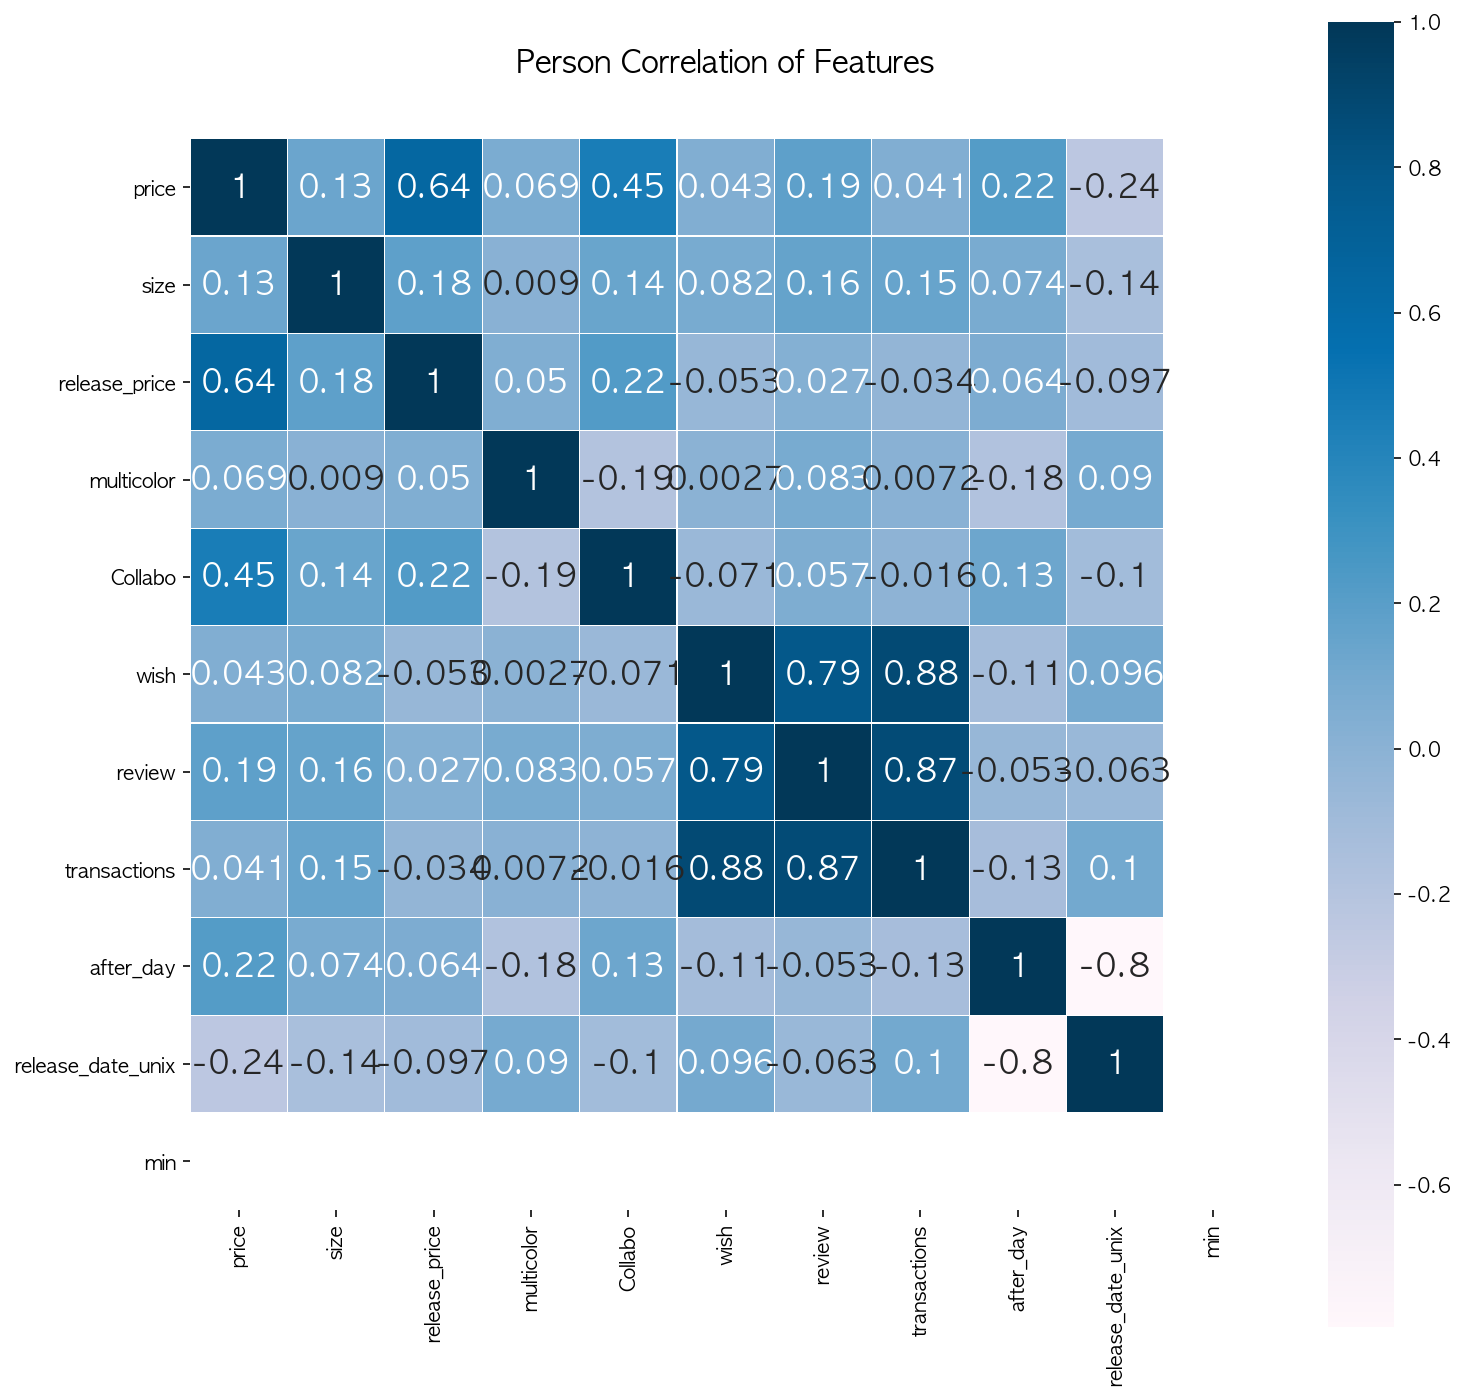

In [210]:
colormap = plt.cm.PuBu
plt.figure(figsize=(12, 12))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0
            , square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [153]:
len(dataset['color'].value_counts())

747

In [881]:
train_set.corr()['price'].apply(abs).sort_values(ascending=False)

price                      1.00
release_price              0.64
Collabo_brand_class_Dior   0.57
Collabo_brand_class_None   0.45
Collabo_brand_class_etc    0.41
release_date_unix          0.24
review_log                 0.23
after_day                  0.22
review                     0.19
size_target_Male           0.17
after_first                0.17
number                     0.16
size_target_Female         0.15
after_day_log              0.14
size                       0.13
type_Mid                   0.11
type_High                  0.11
type_etc                   0.10
wish_log                   0.09
date_unix                  0.09
size_target_Kids           0.06
type_Low                   0.04
wish                       0.04
transactions               0.04
color_count                0.02
Name: price, dtype: float64

In [882]:
cols = train_set.describe().columns

In [883]:
df = train_set[cols]

In [88]:
dataset

,size,price,date,product,release_date,color,release_price,type,brand,category,number,wish,review,transactions,review_log,wish_log,size_target,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix
0,235,124000,2021-11-14,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,7,2,738108,738101
1,255,149000,2021-11-18,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,11,2,738112,738101
2,240,120000,2021-11-24,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,17,3,738118,738101
3,240,124000,2021-11-29,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,22,3,738123,738101
4,225,90000,2021-12-03,(W) Nike Dunk Low SE Primal Black,2021-11-07,BLACK/MULTI-COLOR/BLACK,129000,Low,Nike,Nike Dunk,41947,93,4,30,1,5,Female,W,3,True,BLACK,MULTI-COLOR,BLACK,NaN,NaN,False,None,26,3,738127,738101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
562370,235,239000,2021-12-20,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,153,5,738144,737991
562371,235,245000,2021-12-24,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,157,5,738148,737991
562372,280,289000,2021-12-26,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,159,5,738150,737991
562373,250,235000,2021-12-26,(W) Jordan 1 Mid Anti Gravity Machines,2021-07-20,DARKPONY/SATURNGOLD-REDSTONE,143500,Mid,Jordan,Jordan 1,41697,244,10,18,2,5,Female,W,2,True,DARKPONY,SATURNGOLD-REDSTONE,NaN,NaN,NaN,False,None,159,5,738150,737991


In [98]:
heatmap_data.drop(['multicolor', 'Collabo'], axis=1)

,price,size,release_price,wish,review,transactions,days_after_release,release_date_unix
0,124000,235,129000,93,4,30,7,738101
1,149000,255,129000,93,4,30,11,738101
2,120000,240,129000,93,4,30,17,738101
3,124000,240,129000,93,4,30,22,738101
4,90000,225,129000,93,4,30,26,738101
...,...,...,...,...,...,...,...,...
562370,239000,235,143500,244,10,18,153,737991
562371,245000,235,143500,244,10,18,157,737991
562372,289000,280,143500,244,10,18,159,737991
562373,235000,250,143500,244,10,18,159,737991


In [103]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    train_set.values, i) for i in range(train_set.shape[1])]
vif["features"] = train_set.columns
vif

KeyboardInterrupt: 

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    heatmap_data.drop(['multicolor', 'Collabo'], axis=1).values, i) for i in range(heatmap_data.drop(['multicolor', 'Collabo'], axis=1).shape[1])]
vif["features"] = heatmap_data.drop(['multicolor', 'Collabo'], axis=1).columns
vif

,VIF Factor,features
0,3.21,price
1,160.55,size
2,7.85,release_price
3,7.82,wish
4,6.09,review
5,13.22,transactions
6,1.46,days_after_release
7,153.82,release_date_unix


In [102]:
heatmap_data.drop(['multicolor', 'Collabo'], axis=1).corr()

,price,size,release_price,wish,review,transactions,days_after_release,release_date_unix
price,1.00,0.13,0.64,0.04,0.19,0.04,0.22,-0.24
size,0.13,1.00,0.18,0.08,0.16,0.15,0.07,-0.14
release_price,0.64,0.18,1.00,-0.05,0.03,-0.03,0.06,-0.10
wish,0.04,0.08,-0.05,1.00,0.79,0.88,-0.11,0.10
review,0.19,0.16,0.03,0.79,1.00,0.87,-0.05,-0.06
transactions,0.04,0.15,-0.03,0.88,0.87,1.00,-0.13,0.10
days_after_release,0.22,0.07,0.06,-0.11,-0.05,-0.13,1.00,-0.80
release_date_unix,-0.24,-0.14,-0.10,0.10,-0.06,0.10,-0.80,1.00


### X_train, y_train

In [886]:
print(train_set.shape)
train_set.head(1)

(449900, 41)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix,min_date,after_first,type_High,type_Low,type_Mid,type_etc,size_target_Female,size_target_Kids,size_target_Male,Collabo_brand_class_Dior,Collabo_brand_class_None,Collabo_brand_class_etc
501053,265,580000,2021-03-29,Jordan 1 Low PRM Elephant Print,2021-03-06,WHITE/NEUTRALGREY/SAIL/SMOKEGREY,131500,Jordan,Jordan 1,30604.00,2741.00,80.00,470,4.38,7.92,M,4,1,WHITE,NEUTRALGREY,SAIL,SMOKEGREY,NaN,0,None,23,3.14,737878,737855,2021-03-10,4,0,1,0,0,0,0,1,0,1,0


In [154]:
train_set

,size,price,release_price,after_day,release_date_unix,sex_Female,sex_Kids,sex_Male,multicolor_False,multicolor_True,Collabo_brand_1017Alyx9SM,Collabo_brand_AMaManiere,Collabo_brand_AColdWall,Collabo_brand_AcronymLunar,Collabo_brand_AlealiMay,Collabo_brand_Ambush,Collabo_brand_BillieEilish,Collabo_brand_BlueTheGreat,Collabo_brand_CactusPlantFleaMarket,Collabo_brand_CarharttWIP,Collabo_brand_Clot,Collabo_brand_ClotLunar,Collabo_brand_ClotxFragment,Collabo_brand_CommedesGarconsHommePlus,Collabo_brand_CommedesGarconsShirtxSupreme,Collabo_brand_Dior,Collabo_brand_Fragment,Collabo_brand_FrameSkate,Collabo_brand_GhettoGastro,Collabo_brand_JBalvin,Collabo_brand_JustDon,Collabo_brand_Kasina,Collabo_brand_Kith,Collabo_brand_LanceMountain,Collabo_brand_LeagueofLegends,Collabo_brand_MayumiYamase,Collabo_brand_MelodyEhsani,Collabo_brand_NBA,Collabo_brand_None,Collabo_brand_OffWhite,Collabo_brand_OliviaKim,Collabo_brand_PSNY,Collabo_brand_ParisSaintGermain,Collabo_brand_Parra,Collabo_brand_Quartersnacks,Collabo_brand_RiccardoTisci,Collabo_brand_RuohanWang,Collabo_brand_SoleFly,Collabo_brand_SpaceJamANewLegacy,Collabo_brand_SteveHarrington,Collabo_brand_StrangeLove,Collabo_brand_Stussy,Collabo_brand_Supreme,Collabo_brand_Swarovski,Collabo_brand_TravisScott,Collabo_brand_TravisScottxFragment,Collabo_brand_TrophyRoom,Collabo_brand_Undercover,Collabo_brand_Union,Collabo_False,Collabo_True,type_High,type_Low,type_Mid,type_etc,category_Jordan1,category_NikeAirForce,category_NikeDunk
501053,265,580000,131500,23,737855,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
118169,260,289000,119000,159,737658,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
216044,265,170000,169000,114,737843,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
209580,230,119000,109000,249,737865,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0
159406,250,219000,129000,90,738036,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194278,240,265000,129000,6,737911,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
192476,275,830000,219000,300,737770,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1
17730,270,170000,119000,126,738001,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
28030,270,155000,119000,5,738079,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


In [887]:
print(test_set.shape)
test_set.head(1)

(112475, 41)


,size,price,date,product,release_date,color,release_price,brand,category,number,wish,review,transactions,review_log,wish_log,size_type,color_count,multicolor,color1,color2,color3,color4,color5,Collabo,Collabo_brand,after_day,after_day_log,date_unix,release_date_unix,min_date,after_first,type_High,type_Low,type_Mid,type_etc,size_target_Female,size_target_Kids,size_target_Male,Collabo_brand_class_Dior,Collabo_brand_class_None,Collabo_brand_class_etc
170997,230,239000,2021-03-09,(W) Nike Dunk High Team Red,2021-03-05,SAIL/TEAMRED/PALEIVORY,129000,Nike,Nike Dunk,29216.00,3994.00,104.00,994,4.64,8.29,W,3,1,SAIL,TEAMRED,PALEIVORY,NaN,NaN,0,None,4,1.39,737858,737854,2021-03-06,1,1,0,0,0,1,0,0,0,1,0


In [896]:
y_label = train_set['price']
x_data = train_set.drop(['price', 'date', 'product', 'release_date', 'color', 'number', 'wish', 'review', 'wish_log', 'review_log', 'transactions', 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5', 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix', 'min_date', 'brand', 'category', 'size_type'], axis=1)
# x_data = train_set.drop(['price', 'date', 'product', 'release_date', 'color', 'number', 'wish', 'review', 'wish_log', 'review_log', 'transactions', 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5', 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix', 'min_date'], axis=1)

In [897]:
x_data.head(1)

,size,release_price,multicolor,Collabo,after_day,after_first,type_High,type_Low,type_Mid,type_etc,size_target_Female,size_target_Kids,size_target_Male,Collabo_brand_class_Dior,Collabo_brand_class_None,Collabo_brand_class_etc
501053,265,131500,1,0,23,4,0,1,0,0,0,0,1,0,1,0


# Model Selection Machine

In [ ]:
print(train_set.shape, test_set.shape)

In [ ]:
drop_cols = ['price', 'date', 'product', 'release_date', 'color', 'number'
             , 'wish', 'review', 'wish_log', 'review_log', 'transactions'
             , 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5'
             , 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix'
             , 'min_date', 'brand', 'category', 'size_type']

y_label = train_set['price']
x_data = train_set.drop(drop_cols, axis=1)
y_label_t = test_set['price']
x_data_t = test_set.drop(drop_cols, axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

drop_cols = ['price', 'date', 'product', 'release_date', 'color', 'number'
             , 'wish', 'review', 'wish_log', 'review_log', 'transactions'
             , 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5'
             , 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix'
             , 'min_date', 'brand', 'category', 'size_type']

y_label = train_set['price']
x_data = train_set.drop(drop_cols, axis=1)

scaler = MinMaxScaler()
x_data_scaled = scaler.fit_transform(x_data)
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_data_scaled, y_label, train_size=0.8, random_state=45)
rfr = RandomForestRegressor(max_depth=9, max_features=9, n_estimators=300)
rfr.fit(X_train_val, y_train_val)
rfr_pred = rfr.predict(X_test_val)
rfr_mse = mean_squared_error(y_test_val, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)
r2_score = r2_score(y_test_val, rfr_pred)

print('val_rmse: ', rfr_rmse)
print('val_r2: ', r2_score)

y_label_t = test_set['price']
x_data_t = test_set.drop(drop_cols, axis=1)

x_data_t_scaled = scaler.fit_transform(x_data_t)
rfr_pred_t = rfr.predict(x_data_t_scaled)
rfr_mse_t = mean_squared_error(y_label_t, rfr_pred_t)
rfr_rmse_t = np.sqrt(rfr_mse_t)
r2_score_t = r2_score(y_label_t, rfr_pred_t)

print('test_rmse: ', rfr_rmse_t)
print('test_r2: ', r2_score_t)

### Scaling

In [898]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [899]:
x_data_scaled = scaler.fit_transform(x_data)

### Validation

In [900]:
from sklearn.model_selection import train_test_split

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(x_data_scaled, y_label, train_size=0.8, random_state=45)
print(X_train_val.shape, X_test_val.shape, y_train_val.shape, y_test_val.shape)

(359920, 16) (89980, 16) (359920,) (89980,)


### Model Selection

In [901]:
from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from catboost import CatBoostRegressor

In [902]:
rfr = RandomForestRegressor(max_depth=9, max_features=9, n_estimators=300)
# xgbr = XGBRegressor()
# lgbmr = LGBMRegressor()
# catr = CatBoostRegressor()
# # xgbr = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
# #                            colsample_bytree=1, max_depth=7)

In [903]:
rfr.fit(X_train_val, y_train_val)
# xgbr.fit(X_train,y_train)
# lgbmr.fit(X_train, y_train)
# catr.fit(X_train, y_train)

RandomForestRegressor(max_depth=9, max_features=9, n_estimators=300)

In [904]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

rfr_pred = rfr.predict(X_test_val)
rfr_mse = mean_squared_error(y_test_val, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)

r2_score = r2_score(y_test_val, rfr_pred)

print('rmse: ', rfr_rmse)
print('r2: ', r2_score)

rmse:  125423.12136189654
r2:  0.9022571365421004


### Grid Search

In [808]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     "n_estimators":[100, 300, 1000],
#     "max_depth":[9, 11, 13],
#     "max_features":[9, 11, 13]
# }

# rf_reg = RandomForestRegressor()

# rf_reg_tuned = GridSearchCV(estimator=rf_reg,
#                             param_grid=param_grid,
#                             cv=3,
#                             n_jobs=-1,
#                             verbose=2)

# rf_reg_tuned.fit(X_train_val, y_train_val)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


KeyboardInterrupt: 

In [807]:
# print(rf_reg_tuned.best_score_, rf_reg_tuned.best_estimator_)

0.9020398322449966 RandomForestRegressor(max_depth=9, max_features=9, n_estimators=300)


### Submission(test set)

In [906]:
y_label_t = test_set['price']
x_data_t = test_set.drop(['price', 'date', 'product', 'release_date', 'color', 'number', 'wish', 'review', 'wish_log', 'review_log', 'transactions', 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5', 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix', 'min_date', 'brand', 'category', 'size_type'], axis=1)
# x_data_t = test_set.drop(['price', 'date', 'product', 'release_date', 'color', 'number', 'wish', 'review', 'wish_log', 'review_log', 'transactions', 'color_count', 'color1', 'color2', 'color3', 'color4', 'color5', 'Collabo_brand', 'after_day_log', 'date_unix', 'release_date_unix', 'min_date'], axis=1)

In [908]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

x_data_scaled = scaler.fit_transform(x_data_t)
rfr_pred = rfr.predict(x_data_scaled)
rfr_mse = mean_squared_error(y_label_t, rfr_pred)
rfr_rmse = np.sqrt(rfr_mse)

r2_score = r2_score(y_label_t, rfr_pred)

print('rmse: ', rfr_rmse)
print('r2: ', r2_score)

rmse:  194763.97275333045
r2:  0.7741526047281244


In [867]:
print(1 - (1-rfr.score(X_train_val, y_train_val))*(len(y_train_val)-1)/(len(y_train_val)-X_train_val.shape[1]-1))

0.9161727201704126


In [868]:
X_train_val = pd.DataFrame(data = X_train_val, columns = x_data.columns)
# y_train = pd.DataFrame(data = y_train_val, columns = ['price'])

In [869]:
index=rfr.feature_importances_.argsort()[::-1][0:-1]
index_imp=rfr.feature_importances_[index]
index_name=X_train_val.columns[index].tolist()
feature_importance=list(zip(index_name,index_imp))
feature_importance

[('release_price', 0.23648412399362842),
 ('Collabo_brand_class_Dior', 0.14978662753361294),
 ('Collabo_brand_class_etc', 0.09432052991591561),
 ('after_first', 0.08809841465839055),
 ('Collabo', 0.08215466242670844),
 ('Collabo_brand_class_None', 0.08050676063741814),
 ('after_day', 0.07434287416726784),
 ('brand_Jordan', 0.03202823957812537),
 ('category_Jordan 1', 0.031238947037849973),
 ('brand_Nike', 0.02828163492852422),
 ('type_etc', 0.025524357980411992),
 ('type_Low', 0.016255062876005054),
 ('type_High', 0.014612960812426678),
 ('category_Nike Air Force', 0.012655085963580677),
 ('category_Nike Dunk', 0.008813875633230415),
 ('size', 0.005891438525493235),
 ('size_target_Male', 0.0047314913658057095),
 ('size_type_M', 0.004653893333236405),
 ('multicolor', 0.003646859443988036),
 ('size_target_Female', 0.002273956770498906),
 ('size_target_Kids', 0.0010695529056227926),
 ('size_type_W', 0.0009923505382436642),
 ('type_Mid', 0.0008631281442636169),
 ('size_type_GS', 0.00066673

In [ ]:
# forest = RandomForestClassifier()
# forest.fit(X, y)

importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("{}. feature {} ({:.3f})".format(f + 1, X_train.columns[indices][f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=45)
plt.xlim([-1, X_train.shape[1]])
plt.show()